In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

np.set_printoptions(precision=4, suppress=True)

In [2]:
dataset = pd.read_csv("./50_Startups.csv")
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


# Multiple_Linear_Regression/


**y = b0 + b1\*x1 + b2\*x2 + ... + bn\*xn**
    
    where
    bi = constants
    y = dependent variable
    x = independent variables

## Assumption of Linear Regression

1. linearity
2. homoscedasticity
3. multivariate normality
4. independence of errors
5. lack of multicollinearity

In [3]:
dataset.groupby("State").mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [4]:
X = dataset.iloc[:, 0:4].values # independent_var
Y = dataset.iloc[:, 4].values # dependent_var

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
    
label_encoder_X = LabelEncoder()
X[:, 3] = label_encoder_X.fit_transform(X[:, 3])

onehot_encoder = OneHotEncoder(categorical_features = [3])
X = onehot_encoder.fit_transform(X).toarray()


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# remove the dummy variable trap

In [17]:
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set


In [6]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.2,
                                                   random_state = 0)

# Fitting multiple linear regression to the training set


In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
y_predicted = regressor.predict(X = x_test)


# Deviation from original output

In [9]:
diff = y_test - y_predicted
sum_y_test = sum(y_test)
deviation = ((j-i)*100/sum_y_test for i, j in zip(y_test, y_predicted))
print("Deviation from test set")

for i in zip(y_test, y_predicted, diff, deviation):
    print("%.2f" %i[3], "%")


Deviation from test set
-0.02 %
-0.95 %
-1.12 %
-0.48 %
-1.02 %
0.91 %
-1.09 %
0.11 %
0.30 %
0.14 %


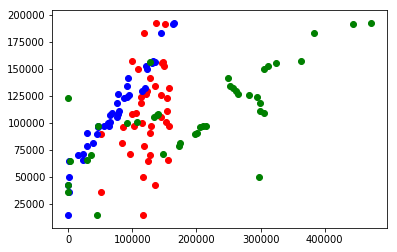

In [12]:
plt.scatter(x_train[:,3], y_train, color = "red")
plt.scatter(x_train[:,2], y_train, color = "blue")
plt.scatter(x_train[:,4], y_train, color = "green")


# Backward elimination

In [14]:
import statsmodels.formula.api as sm

